# History of Activation Functions

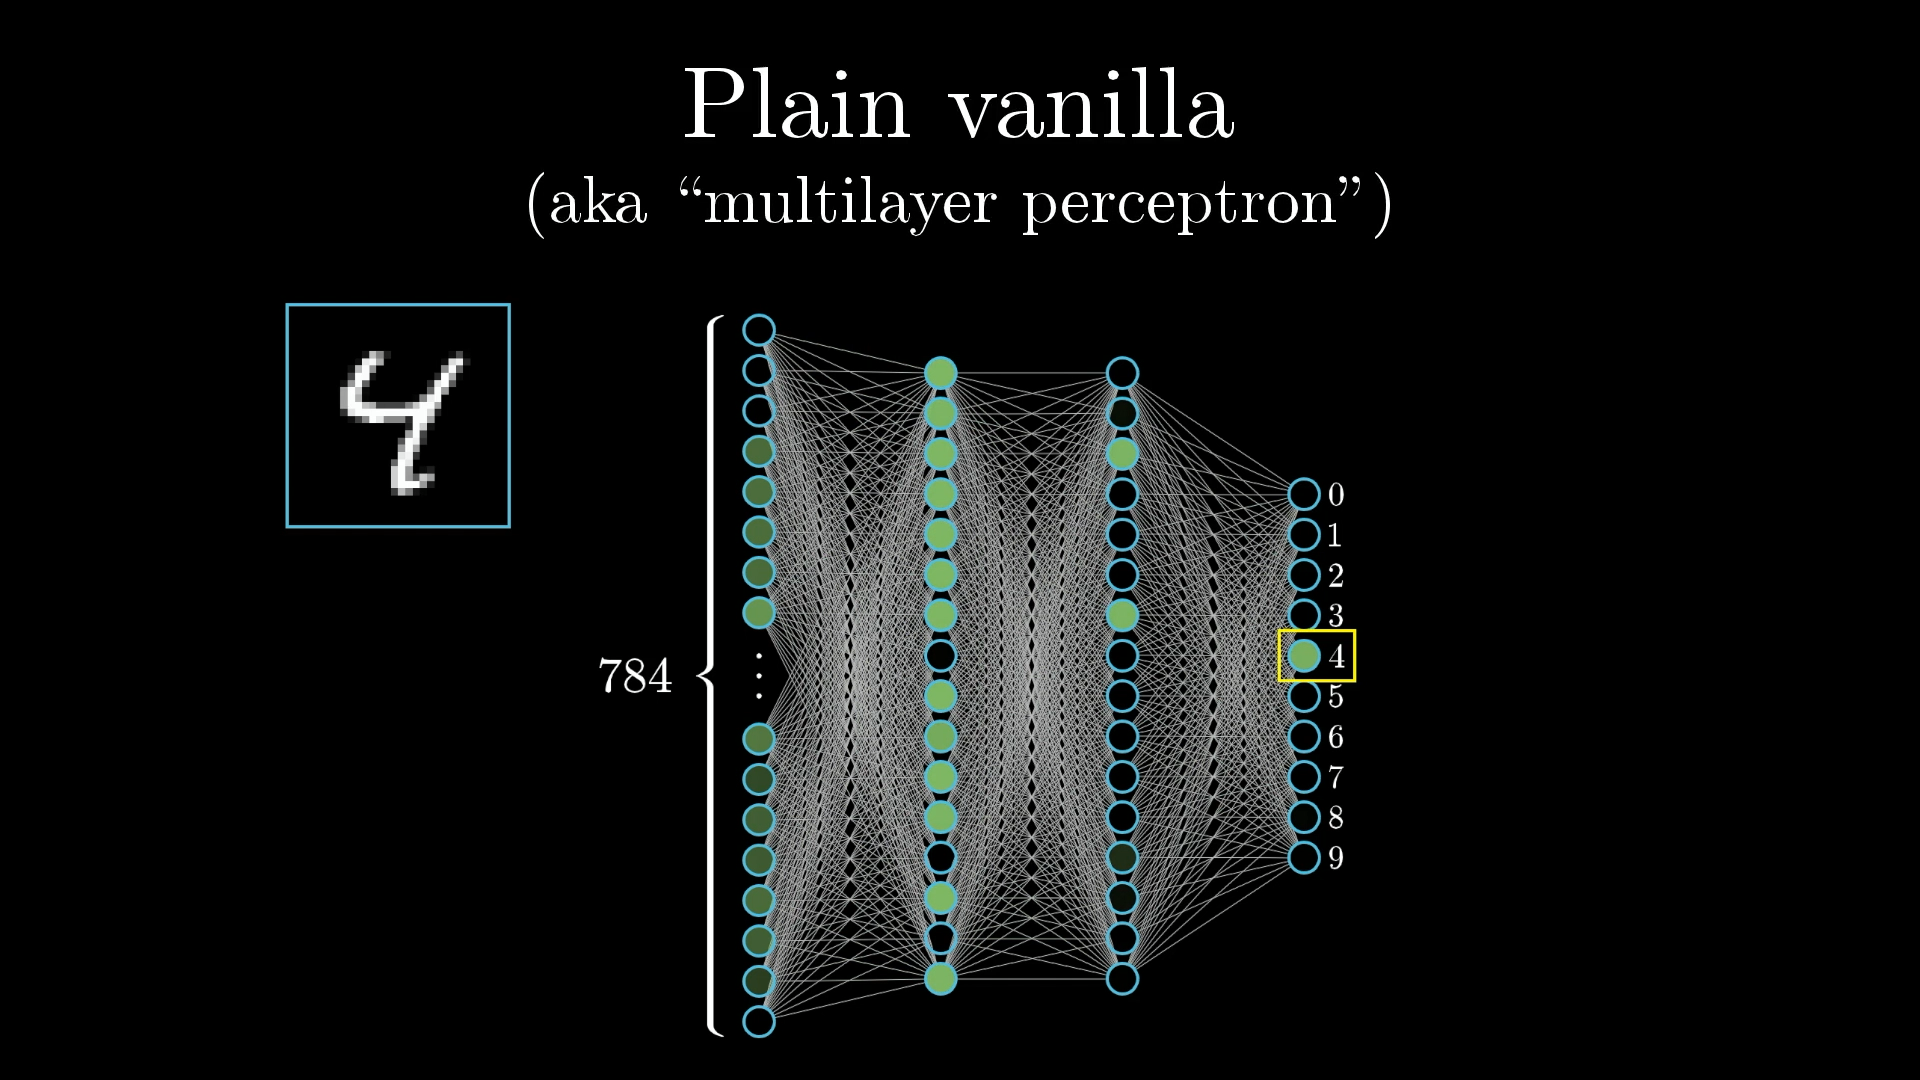

The first activation function was the binary step function. It was modeled off the rough idea of the activation threshold of neurons in the brain where if the neurons in our brain reach some threshold, the neuron is activated. 

So in the network if the operation $W*x+b$ was $\geq 0$ our neuron would fire and if the operation gave us a value $<0$ then the neuron wouldn't fire. For the example above you would hope that the first hidden layer would have neuron's that recognize the edges of the 4 would light up and in the second layer you would have the line to the right and the L shape light up 

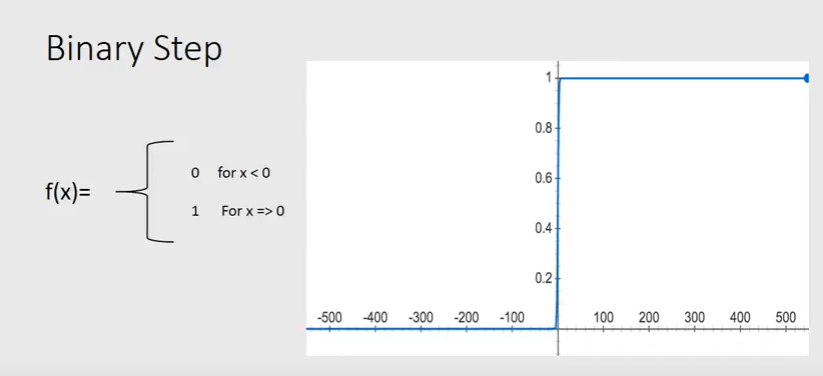

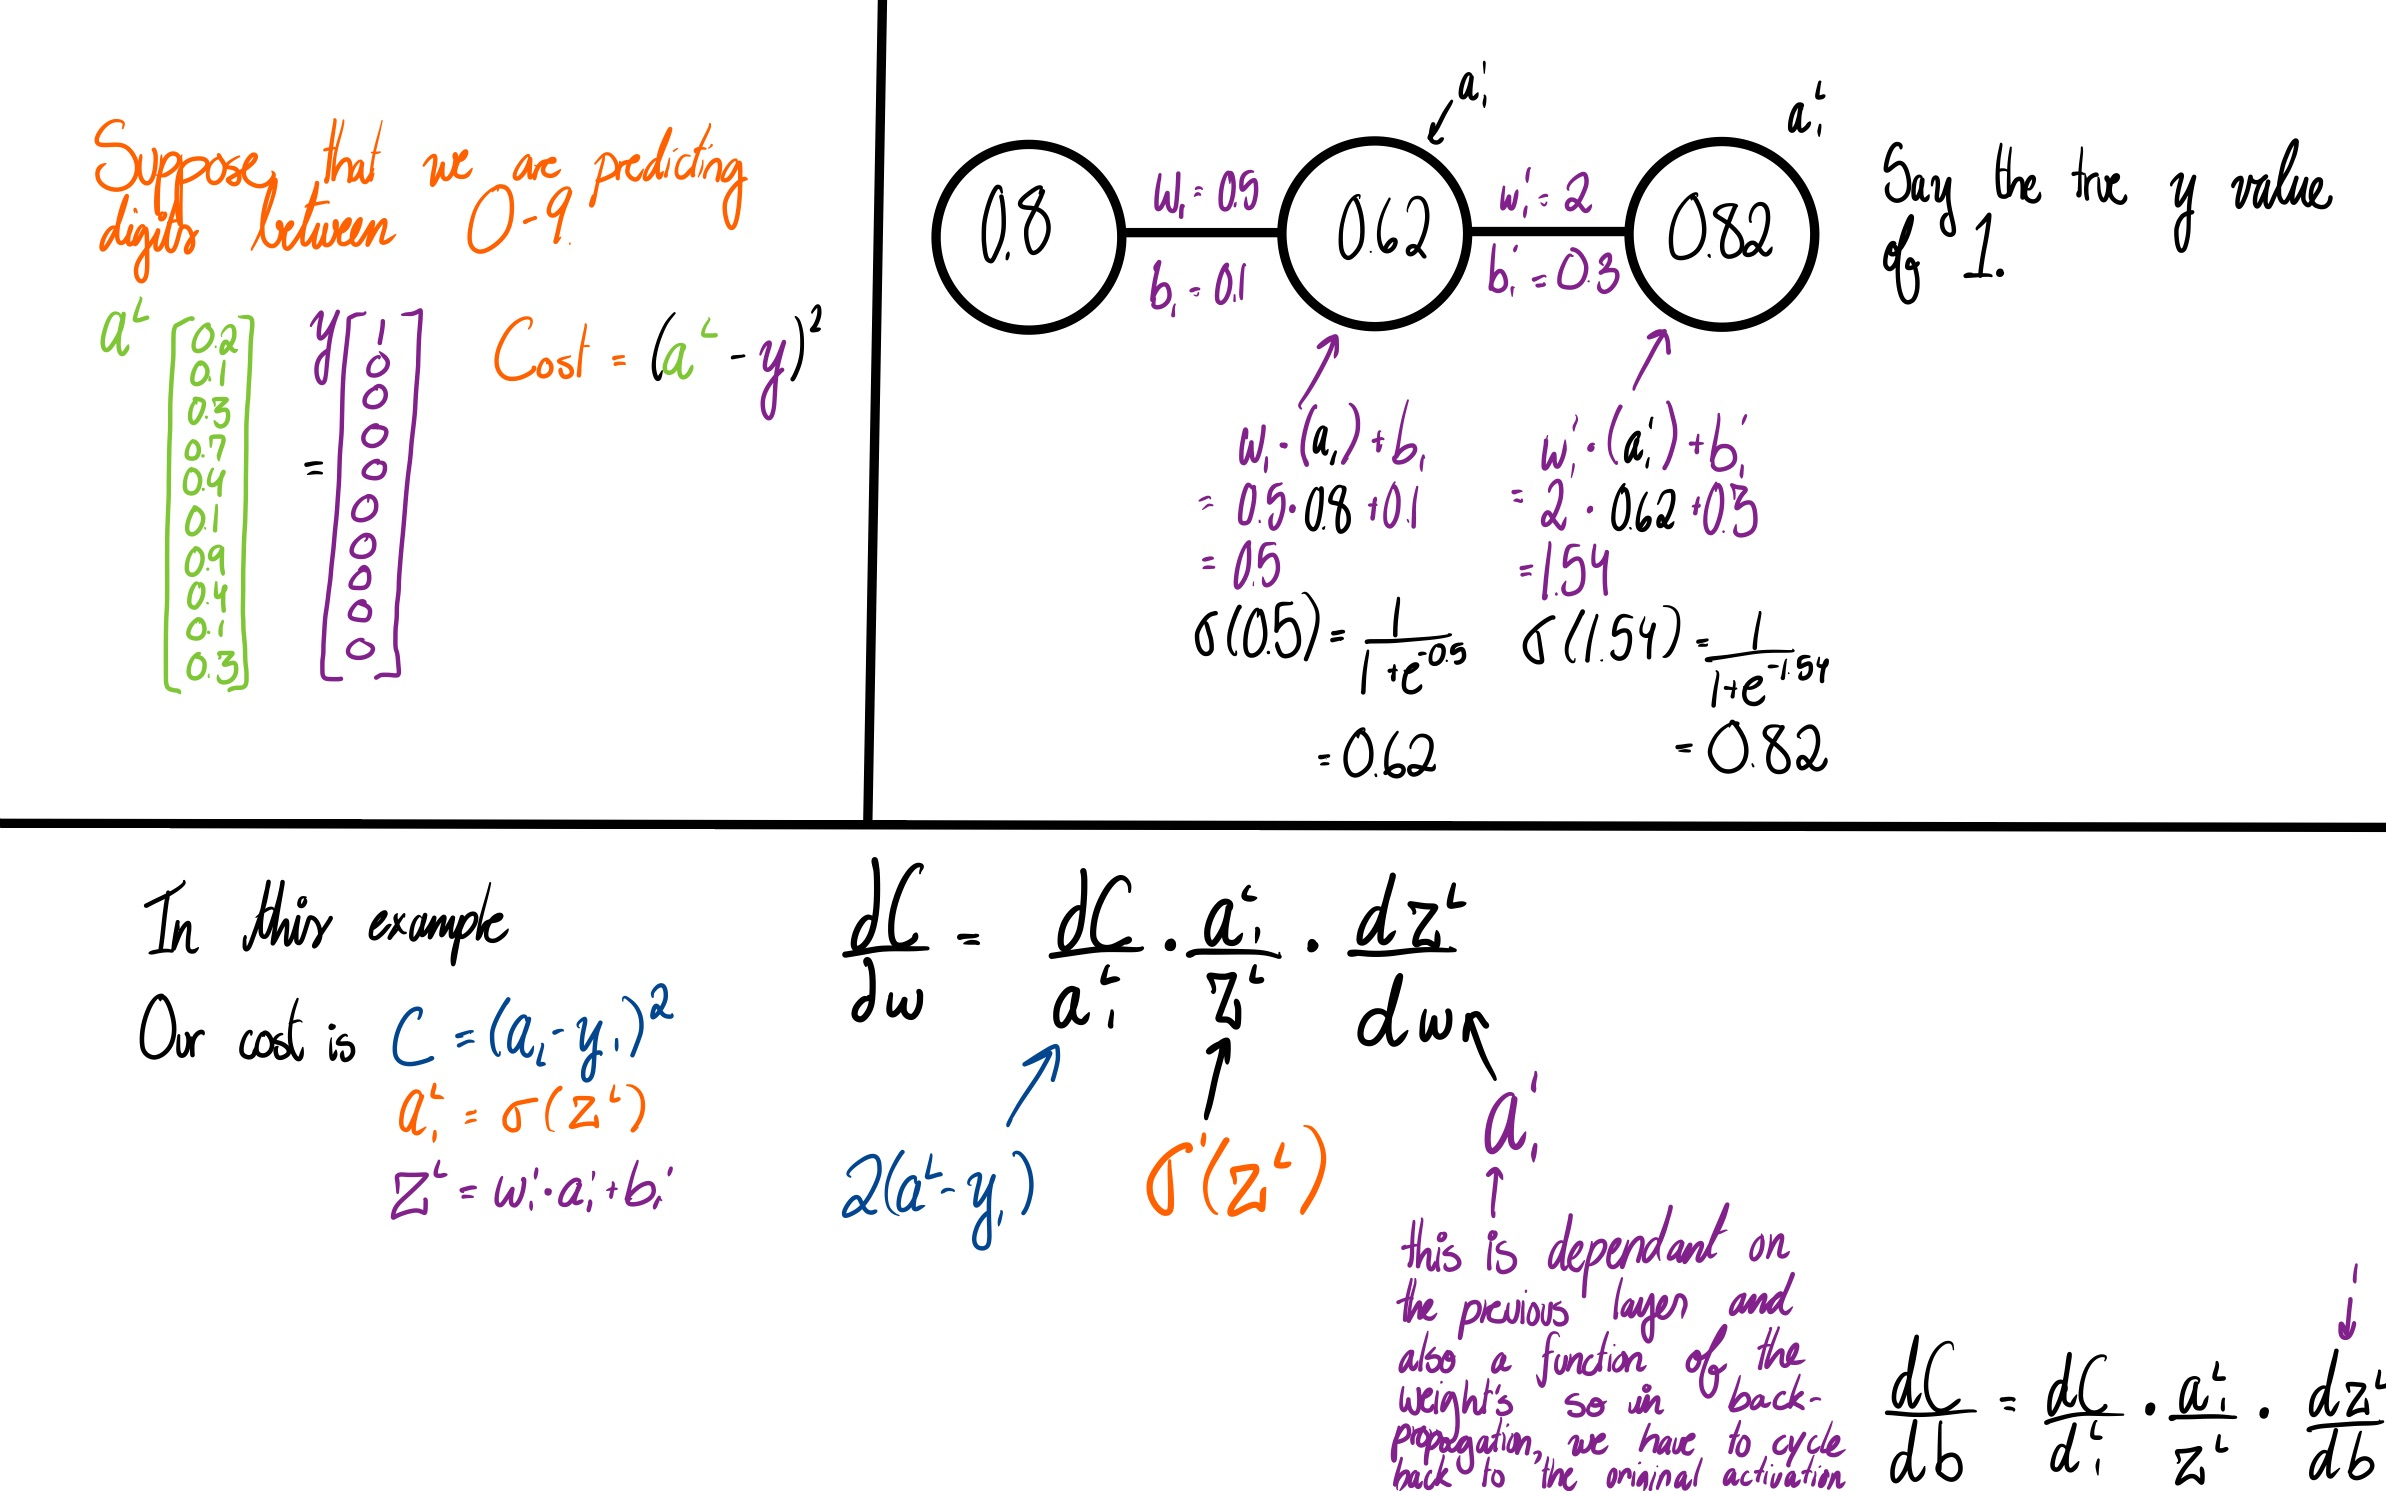

After the advent of backpropagation as the mechanism by which neural networks, the activation now needed to be continuous and differentiable which meant the binary step function wouldn't be sufficient 


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button
from ipywidgets import interactive
def sigmoid(constant):
  t = np.linspace(-8,8)
  y=1/(1+math.e**(-(constant*t)))
  plt.plot(t, y)
  plt.show()
def tanh(constant):
  t = np.linspace(-8,8)
  y=(math.e**(constant*t)-math.e**(-constant*t))/(math.e**(constant*t)+math.e**(-constant*t))
  plt.plot(t, y)
  plt.show()

The sigmoid function is a continous differentiable extension of the binary step function which can be seen if you increase the constant value c next to x in the function $\dfrac{1}{1+e^{-cx}}$

It's also nice for backpropagation because it's monotonic so increasing a weight's value will correspond to a neuron having greater importance 

In [ ]:
%matplotlib inline
interactive_plot = interactive(sigmoid, constant=(0,30,1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=15, description='constant', max=30), Output(layout=Layout(height='350px'…

In [ ]:
%matplotlib inline
interactive_plot = interactive(sigmoid, constant=(0,5,0.2))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=2.0, description='constant', max=5.0, step=0.2), Output(layout=Layout(…

http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf

https://arxiv.org/pdf/1502.03167.pdf

https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf


https://stats.stackexchange.com/questions/330559/why-is-tanh-almost-always-better-than-sigmoid-as-an-activation-function

A natural extension to the sigmoid function was the tanh function which is a shifted sigmoid that allows for us to have negative values in our activation and for our activation to be zero centered 



In [ ]:
%matplotlib inline
interactive_plot = interactive(tanh, constant=(0,5,0.2))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=2.0, description='constant', max=5.0, step=0.2), Output(layout=Layout(…

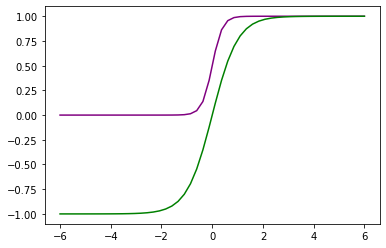

In [ ]:
from scipy.misc import derivative
def sigmoid_function(x):
    return 1/(1+math.e**(-5*x))
def relu_function(x):
    return np.maximum(0,x)
def tanh_function(x):
    return (math.e**(x)-math.e**(-x))/(math.e**(x)+math.e**(-x))
# calculating its derivative
def sigmoid_deriv(x):
    return derivative(sigmoid_function, x)
def tanh_deriv(x):
    return derivative(tanh_function, x)
def sigmoid_deriv2(x):
    return derivative(sigmoid_deriv, x)
def tanh_deriv2(x):
    return derivative(tanh_deriv, x)
def sigmoid_deriv3(x):
    return derivative(sigmoid_deriv2, x)
def tanh_deriv3(x):
    return derivative(tanh_deriv2, x)
def sigmoid_deriv4(x):
    return derivative(sigmoid_deriv3, x)
def tanh_deriv4(x):
    return derivative(tanh_deriv3, x)
# defininf x-axis intervals
y = np.linspace(-6, 6)
  
# plotting the function
plt.plot(y, sigmoid_function(y), color='purple', label='sigmoid')
  

# plotting the function
plt.plot(y, tanh_function(y), color='green', label='tanh')


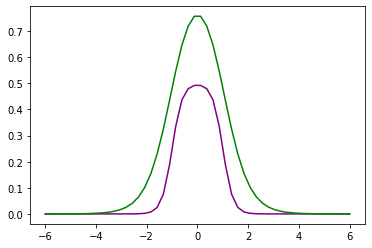

In [ ]:
# plotting its derivative
plt.plot(y, sigmoid_deriv(y), color='purple', label='sigmoid_Derivative')
# plotting its derivative
plt.plot(y, tanh_deriv(y), color='green', label='tanh_Derivative')

However, both Tanh and the sigmoid function suffered from the vanishing gradient problem where our gradients would tend to 0 leading for no learning to occur, which is why ReLU was introduced. The gradients are 0 for negative values and 1 for positive values 

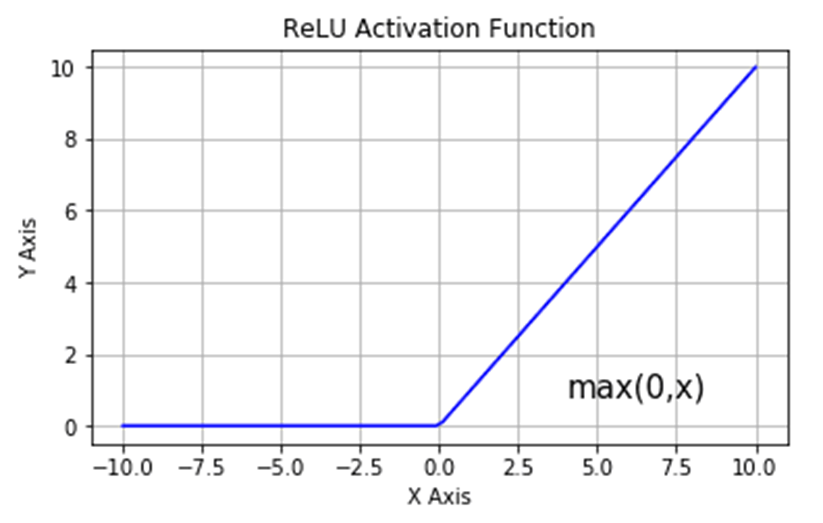

The problem is that when we apply ReLU we end up zero-ing out many activations so they'll have no use to the model in future layers which sometimes may be advantangous because it reduces the amount of neurons we have to work with. However, these activations could be useful in future layers so sometime's it isn't advantagous to zero them out. This brings about the addition of leaky reLU which decreases the magnitude of negative weights to decrease their influence but still keeps them if necessary for future layers 

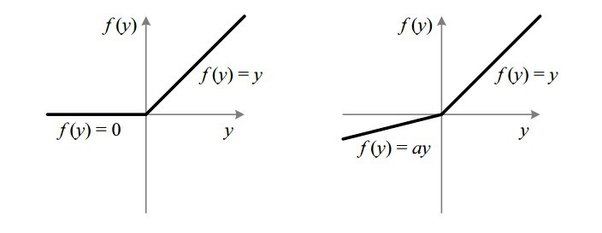

However, leaky ReLU also suffers from the problem of not being differentiable at 0 (although this could be solved by artifcially replacing 0 with an arbitrarily small value) but this problem has been solved by google's swish function which is said to be the one of the best activation functions currently, however it uses an exponential which makes it more computationally expensive than ReLU which is why ReLU is still the standard activation

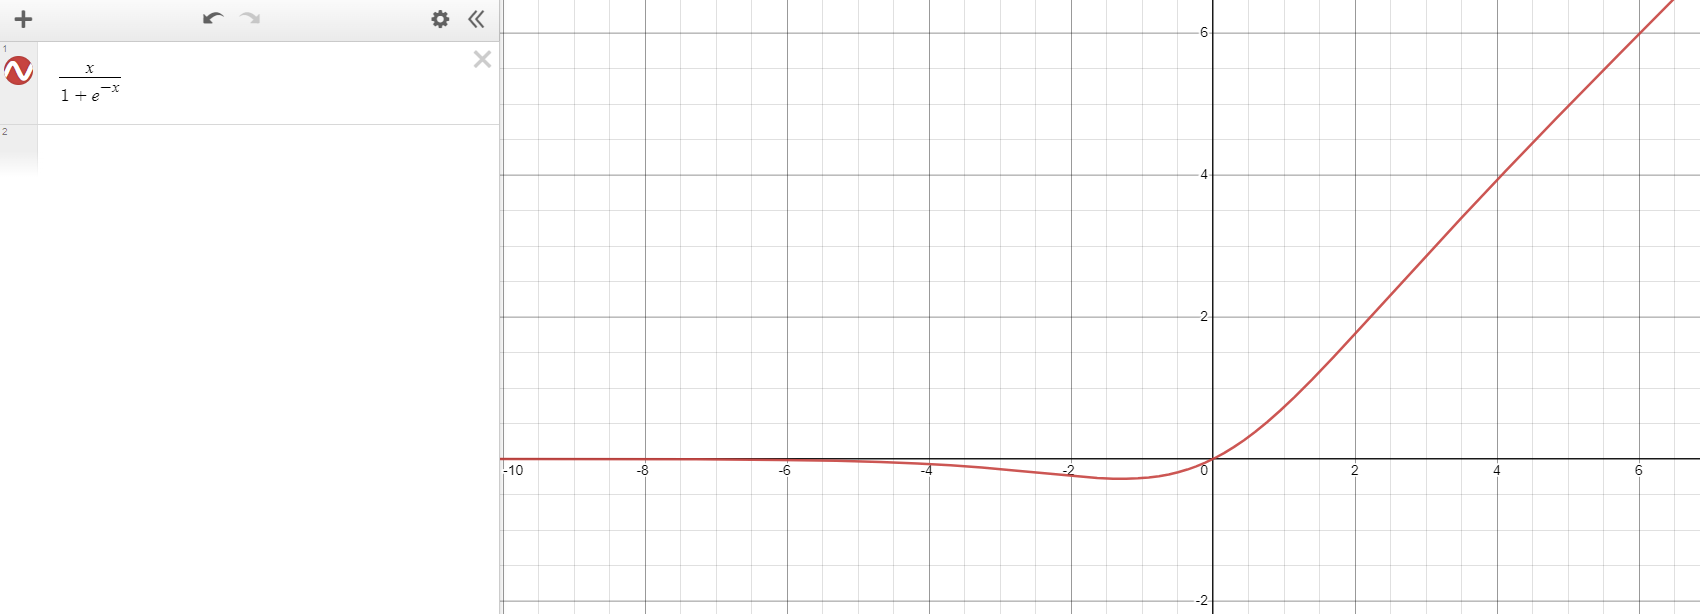

##Convolving an image 

In [ ]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
from skimage.measure import block_reduce
from scipy.signal import convolve2d

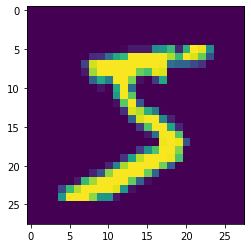

In [ ]:
plt.imshow(x_train[0])

In [ ]:
edge_detection = np.array([[0,1,0],
                          [1,-5,1],
                          [0,1,0]]) 
random        = np.array([[1,0,1],
                          [0,3,0],
                          [1,0,1]]) 

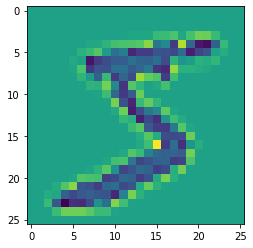

In [ ]:
im2 = convolve2d(x_train[0]/255, edge_detection,mode='valid')
plt.imshow(im2)
plt.show()

In [ ]:
im2

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       

##Apply Sigmoid to this image 

In [ ]:
sigmoid_v = np.vectorize(sigmoid_function)

In [ ]:
sig_im3=sigmoid_v(im2)

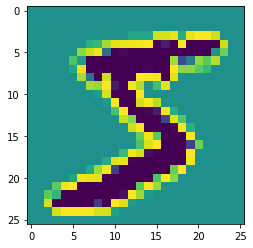

In [ ]:
plt.imshow(sig_im3)

In [ ]:
im3_sig = convolve2d(sig_im3, edge_detection,mode='valid')

In [ ]:
sig_im3

array([[5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01],
       [5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01],
       [5.00000000e-01, 5.00000000e-01, 5.00000000e-01

In [ ]:
im3_sig

array([[-5.00000000e-01, -5.00000000e-01, -5.00000000e-01,
        -5.00000000e-01, -5.00000000e-01, -5.00000000e-01,
        -5.00000000e-01, -5.00000000e-01, -5.00000000e-01,
        -5.00000000e-01, -5.00000000e-01, -5.00000000e-01,
        -5.00000000e-01, -5.00000000e-01, -5.00000000e-01,
        -5.00000000e-01, -5.00000000e-01, -5.00000000e-01,
        -5.00000000e-01, -5.00000000e-01, -5.00000000e-01,
        -5.00000000e-01, -5.00000000e-01, -5.00000000e-01],
       [-5.00000000e-01, -5.00000000e-01, -5.00000000e-01,
        -5.00000000e-01, -5.00000000e-01, -5.00000000e-01,
        -5.00000000e-01, -5.00000000e-01, -5.00000000e-01,
        -5.00000000e-01, -4.85298357e-01, -4.12669376e-01,
        -4.12669376e-01, -4.12669376e-01, -7.79459479e-02,
        -6.49691691e-02, -3.13292517e-02, -3.75239492e-01,
        -3.71511412e-02, -6.69285092e-03, -7.82064194e-03,
        -7.65483357e-02, -5.00000000e-01, -5.00000000e-01],
       [-5.00000000e-01, -5.00000000e-01, -5.00000000e

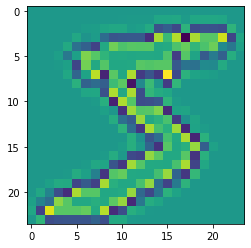

In [ ]:
plt.imshow(im3_sig)

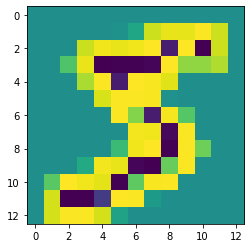

(13, 13)

In [ ]:
import skimage.measure
sig_im4=skimage.measure.block_reduce(sig_im3, (2,2), np.max)
plt.imshow(sig_im4)
plt.show()
sig_im4.shape

In [ ]:
np.max(sig_im3)

0.9999661696245808

In [ ]:
sig_im4

array([[5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01],
       [5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.14701643e-01, 5.87330624e-01, 9.22054052e-01,
        9.68670748e-01, 9.62848859e-01, 9.93307149e-01, 9.23451664e-01,
        5.00000000e-01],
       [5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 9.19188546e-01,
        9.79422102e-01, 9.67458517e-01, 9.80197789e-01, 9.97575271e-01,
        7.79459479e-02, 9.99452611e-01, 5.47388670e-04, 9.23451664e-01,
        5.00000000e-01],
       [5.00000000e-01, 5.00000000e-01, 7.23278810e-01, 9.70407527e-01,
        5.36765806e-04, 6.95866728e-03, 6.95866728e-03, 1.54152493e-02,
        9.98570528e-01, 8.33111719e-01, 8.35820149e-01, 8.82840453e-01,
        5.00000000e-01],
       [5.00000000e-01, 5.00000000e-

##Apply tanh to this image 

In [ ]:
tanh_v = np.vectorize(tanh_function)

In [ ]:
tanh_im3=tanh_v(im2)

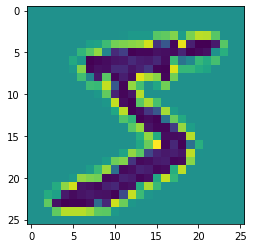

In [ ]:
plt.imshow(tanh_im3)

In [ ]:
im4_tanh = convolve2d(tanh_im3, edge_detection,mode='valid')

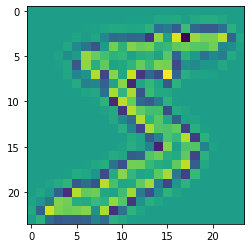

In [ ]:
plt.imshow(im4_tanh)

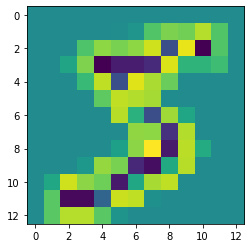

(13, 13)

In [ ]:
import skimage.measure
tanh_im4=skimage.measure.block_reduce(tanh_im3, (2,2), np.max)
plt.imshow(tanh_im4)
plt.show()
sig_im4.shape

In [ ]:
tanh_im4

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.01176416,  0.07047123,  0.45747844,  0.59558335,  0.57232959,
         0.76159416,  0.46057371,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.45125456,  0.64840922,
         0.59049868,  0.65293174,  0.83484686, -0.45747844,  0.90550195,
        -0.90550195,  0.46057371,  0.        ],
       [ 0.        ,  0.        ,  0.1898262 ,  0.60312171, -0.90620559,
        -0.75828051, -0.75828051, -0.68121231,  0.86422579,  0.31092459,
         0.31446272,  0.3832994 ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.36644782,  0.78521317,
        -0.45125456,  0.87748004,  0.72848434,  0.53983419,  0.        ,
         0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.      

In [ ]:
sig_im4

array([[5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01],
       [5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 5.00000000e-01,
        5.00000000e-01, 5.14701643e-01, 5.87330624e-01, 9.22054052e-01,
        9.68670748e-01, 9.62848859e-01, 9.93307149e-01, 9.23451664e-01,
        5.00000000e-01],
       [5.00000000e-01, 5.00000000e-01, 5.00000000e-01, 9.19188546e-01,
        9.79422102e-01, 9.67458517e-01, 9.80197789e-01, 9.97575271e-01,
        7.79459479e-02, 9.99452611e-01, 5.47388670e-04, 9.23451664e-01,
        5.00000000e-01],
       [5.00000000e-01, 5.00000000e-01, 7.23278810e-01, 9.70407527e-01,
        5.36765806e-04, 6.95866728e-03, 6.95866728e-03, 1.54152493e-02,
        9.98570528e-01, 8.33111719e-01, 8.35820149e-01, 8.82840453e-01,
        5.00000000e-01],
       [5.00000000e-01, 5.00000000e-

## Apply ReLU to this image 

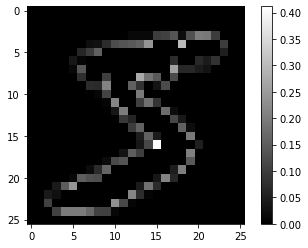

(26, 26)

In [ ]:
import copy 
im3=copy.deepcopy(im2)
im3[im3<0] = 0
im3=im3/5
im3.shape
plt.imshow(im3,cmap="gray")
plt.colorbar()
plt.show()
im3.shape

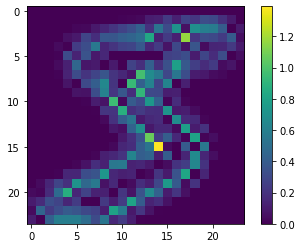

In [ ]:
im1000 = convolve2d(im3, random,mode='valid')
plt.imshow(im1000)
plt.colorbar()
plt.show()

In [ ]:
im3

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
      

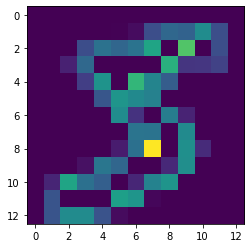

(13, 13)

In [ ]:
#Image after both pooling and RELU where Relu normalizes the image and pooling 
#reduces the dimensionality 
import skimage.measure
im4=skimage.measure.block_reduce(im3, (2,2), np.max)
plt.imshow(im4)
plt.show()
im4.shape

In [ ]:
im4

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00235294, 0.01411765, 0.09882353, 0.1372549 , 0.13019608,
        0.2       , 0.09960784, 0.        ],
       [0.        , 0.        , 0.        , 0.0972549 , 0.1545098 ,
        0.13568627, 0.15607843, 0.24078431, 0.        , 0.30039216,
        0.        , 0.09960784, 0.        ],
       [0.        , 0.        , 0.03843137, 0.13960784, 0.        ,
        0.        , 0.        , 0.        , 0.26196078, 0.06431373,
        0.06509804, 0.08078431, 0.        ],
       [0.        , 0.        , 0.        , 0.07686275, 0.21176471,
        0.        , 0.27294118, 0.18509804, 0.12078431, 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.10980392,
        0.21490196, 0.19607

#Visualizing the impact of varying activations 

The following code is taken from https://towardsdatascience.com/visualizing-intermediate-activations-of-a-cnn-trained-on-the-mnist-dataset-2c34426416c8 which we will use to visualize what the how the activation functions change what the activations in each layer looks like for RELU, Sigmoid, and tanh

##Using ReLU

1/1 [==============================] - 0s 17ms/step
6	

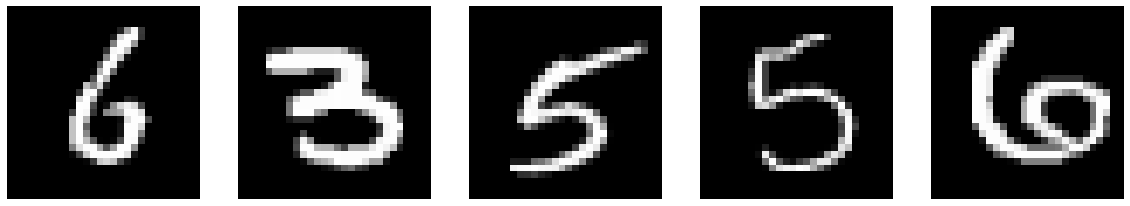

In [ ]:
# Visualize Intermediate Activations 
import pandas as pd
import os
import keras 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.models import Model
from sklearn.model_selection import train_test_split

num_classes=10
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#onehot encoding
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

def model():
    
    inputs = Input(shape=(28,28,1))
    x = Conv2D(24,kernel_size=(3,3),padding='same',activation="relu")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(48, (3, 3), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same',activation='relu')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.25)(x)

    output = Dense(num_classes, activation="softmax")(x)
    
    model = Model(inputs,output)
    
    model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
    
    return model


y_train_cat.shape

epochs = 1
batch_size=256

model = model()
history = model.fit(X_train,y_train_cat,
         epochs=epochs,
         batch_size=batch_size,
         validation_data=(X_test,y_test_cat))
figure = plt.figure(figsize=(20,20))

for i in range(5):
    figure.add_subplot(1,5,i+1)
    plt.imshow(X_test[i+50,:,:],cmap="gray")
    plt.axis("off")
    print(np.squeeze(np.argmax(model.predict(X_test[i+50].reshape(1,28,28,1)),axis=1),axis=0),end="\t")

layer_outputs = [layer.output for layer in model.layers[1:7]]


activation_model = Model(inputs=model.input,outputs=layer_outputs)

(-0.5, 27.5, 27.5, -0.5)

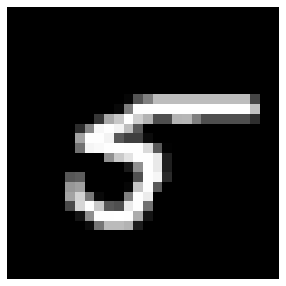

In [ ]:
#change index for different numbers 
import random
number = 5

list_of_indexes = np.where(y_test==number)
index = np.random.choice(list_of_indexes[0], 1)
img = X_test[index].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

1/1 [==============================] - 0s 69ms/step


<ipython-input-65-77f27eb7783c>:17: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


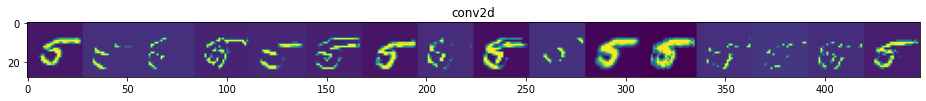

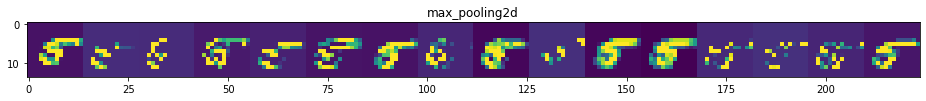

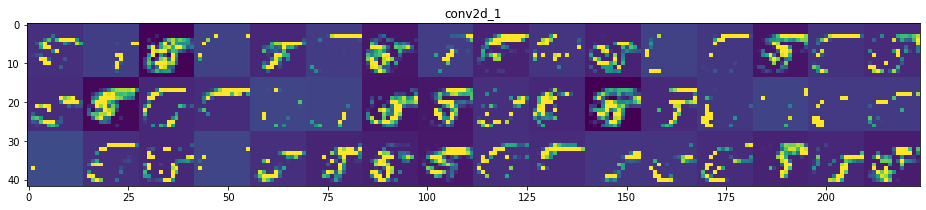

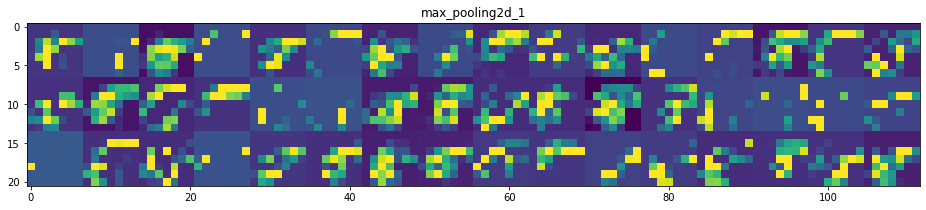

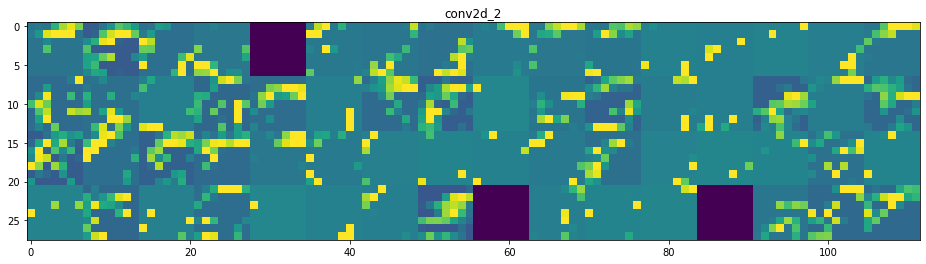

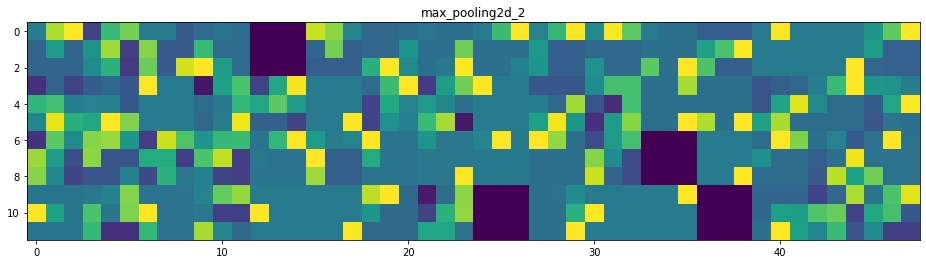

In [ ]:
activations = activation_model.predict(img)

layer_names = []
for layer in model.layers[1:7]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

##Using Sigmoid

1/1 [==============================] - 0s 21ms/step
6	

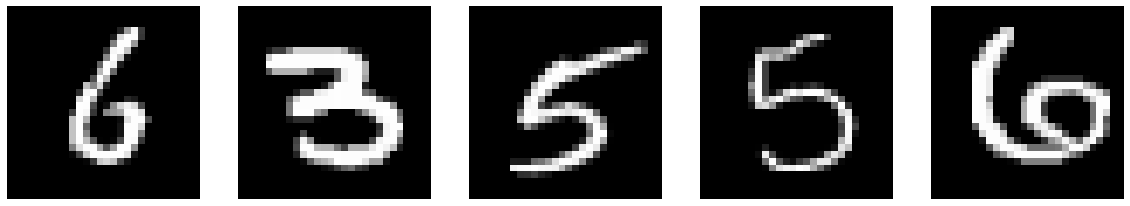

In [ ]:
# Visualize Intermediate Activations 
import pandas as pd
import os
import keras 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.models import Model
from sklearn.model_selection import train_test_split

num_classes=10
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#onehot encoding
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

def model():
    
    inputs = Input(shape=(28,28,1))
    x = Conv2D(24,kernel_size=(3,3),padding='same',activation="sigmoid")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(48, (3, 3), padding='same',activation='sigmoid')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same',activation='sigmoid')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='sigmoid')(x)
    x = Dropout(0.25)(x)

    output = Dense(num_classes, activation="softmax")(x)
    
    model = Model(inputs,output)
    
    model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
    
    return model


y_train_cat.shape

epochs = 1
batch_size=256

model = model()
history = model.fit(X_train,y_train_cat,
         epochs=epochs,
         batch_size=batch_size,
         validation_data=(X_test,y_test_cat))
figure = plt.figure(figsize=(20,20))

for i in range(5):
    figure.add_subplot(1,5,i+1)
    plt.imshow(X_test[i+50,:,:],cmap="gray")
    plt.axis("off")
    print(np.squeeze(np.argmax(model.predict(X_test[i+50].reshape(1,28,28,1)),axis=1),axis=0),end="\t")

layer_outputs = [layer.output for layer in model.layers[1:7]]


activation_model = Model(inputs=model.input,outputs=layer_outputs)

(-0.5, 27.5, 27.5, -0.5)

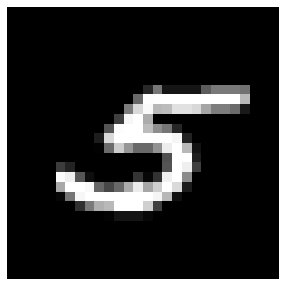

In [ ]:
#change index for different numbers 
import random
number = 5

list_of_indexes = np.where(y_test==number)
index = np.random.choice(list_of_indexes[0], 1)
img = X_test[index].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

1/1 [==============================] - 0s 77ms/step


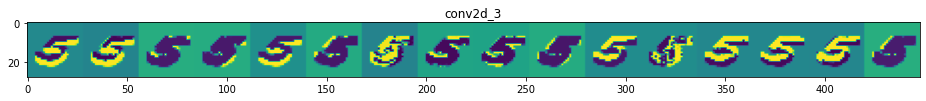

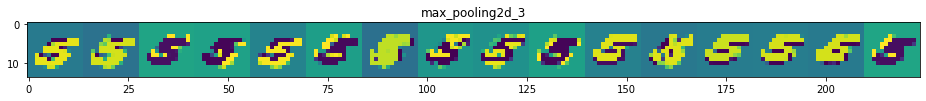

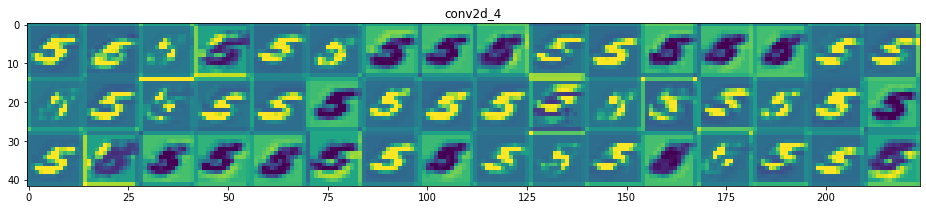

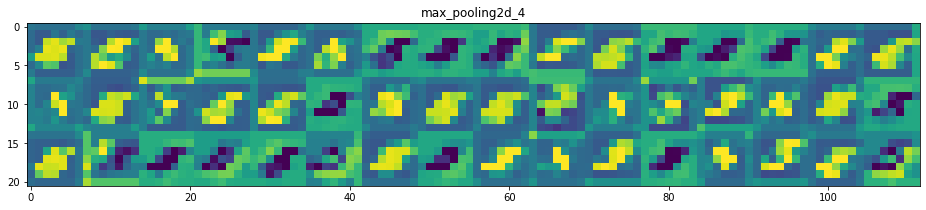

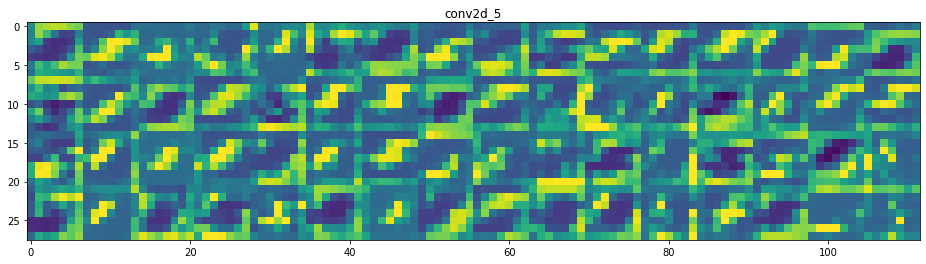

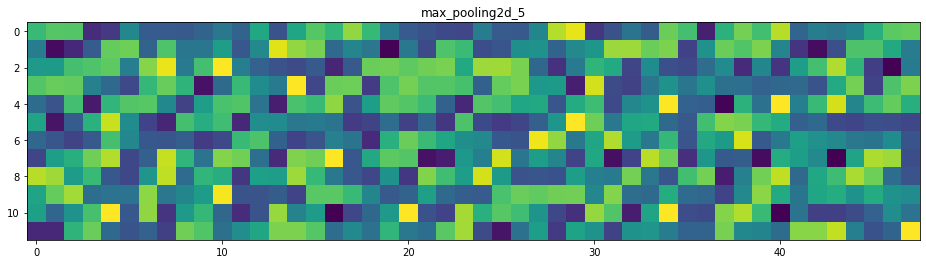

In [ ]:
activations = activation_model.predict(img)

layer_names = []
for layer in model.layers[1:7]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

##Using tanh

235/235 [==============================] - 69s 292ms/step - loss: 0.2767 - accuracy: 0.9194 - val_loss: 0.0705 - val_accuracy: 0.9784


1/1 [==============================] - 0s 23ms/step
6	

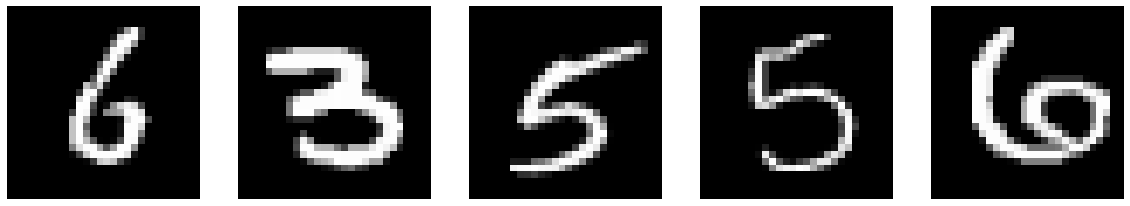

In [ ]:
# Visualize Intermediate Activations 
import pandas as pd
import os
import keras 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Input
from keras.models import Model
from sklearn.model_selection import train_test_split

num_classes=10
(X_train, y_train), (X_test, y_test) = mnist.load_data()
#onehot encoding
y_train_cat = keras.utils.to_categorical(y_train, num_classes)
y_test_cat = keras.utils.to_categorical(y_test, num_classes)

def model():
    
    inputs = Input(shape=(28,28,1))
    x = Conv2D(24,kernel_size=(3,3),padding='same',activation="tanh")(inputs)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(48, (3, 3), padding='same',activation='tanh')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Conv2D(64, (3, 3), padding='same',activation='tanh')(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = Flatten()(x)
    x = Dense(128, activation='tanh')(x)
    x = Dropout(0.25)(x)

    output = Dense(num_classes, activation="softmax")(x)
    
    model = Model(inputs,output)
    
    model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
    
    return model


y_train_cat.shape

epochs = 1
batch_size=256

model = model()
history = model.fit(X_train,y_train_cat,
         epochs=epochs,
         batch_size=batch_size,
         validation_data=(X_test,y_test_cat))
figure = plt.figure(figsize=(20,20))

for i in range(5):
    figure.add_subplot(1,5,i+1)
    plt.imshow(X_test[i+50,:,:],cmap="gray")
    plt.axis("off")
    print(np.squeeze(np.argmax(model.predict(X_test[i+50].reshape(1,28,28,1)),axis=1),axis=0),end="\t")

layer_outputs = [layer.output for layer in model.layers[1:7]]


activation_model = Model(inputs=model.input,outputs=layer_outputs)

(-0.5, 27.5, 27.5, -0.5)

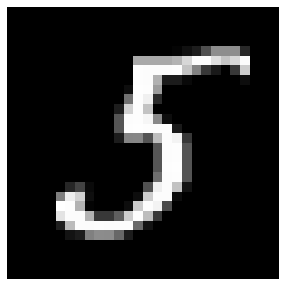

In [ ]:
#change index for different numbers 
import random
number = 5

list_of_indexes = np.where(y_test==number)
index = np.random.choice(list_of_indexes[0], 1)
img = X_test[index].reshape(1,28,28,1)
fig = plt.figure(figsize=(5,5))
plt.imshow(img[0,:,:,0],cmap="gray")
plt.axis('off')

1/1 [==============================] - 0s 60ms/step


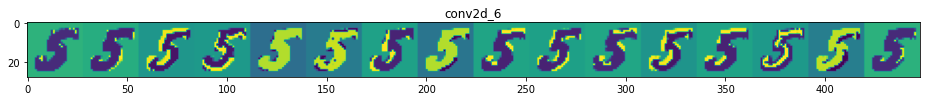

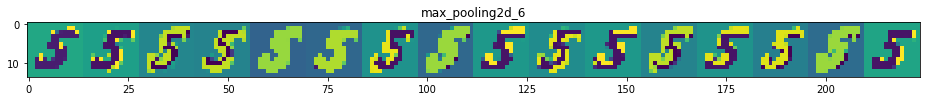

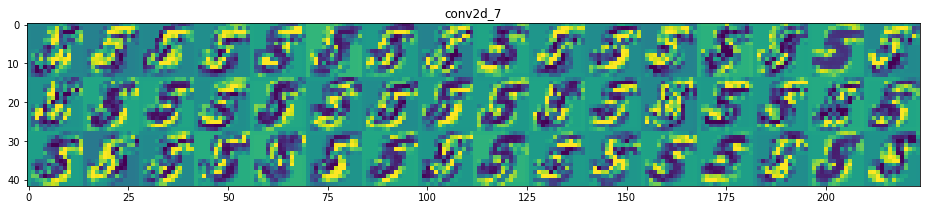

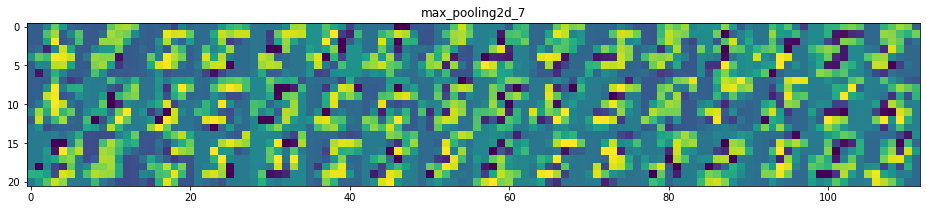

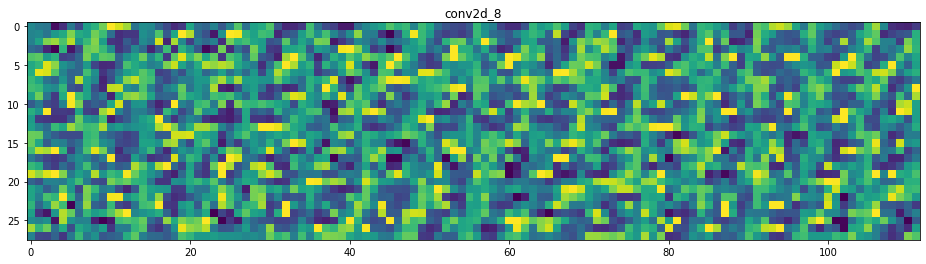

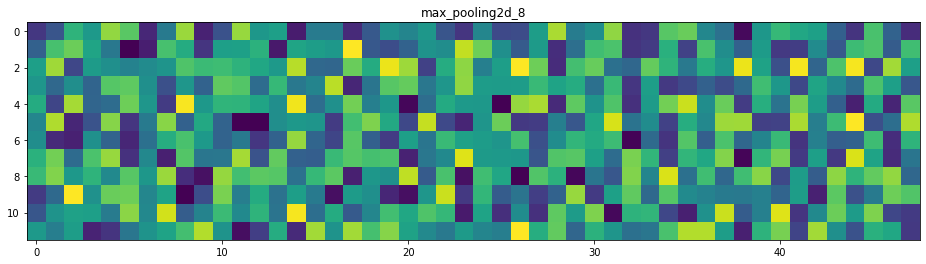

In [ ]:
activations = activation_model.predict(img)

layer_names = []
for layer in model.layers[1:7]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).
    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,:, :, col * images_per_row + row]
            channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

# What types of input can't be classified by a linear network 


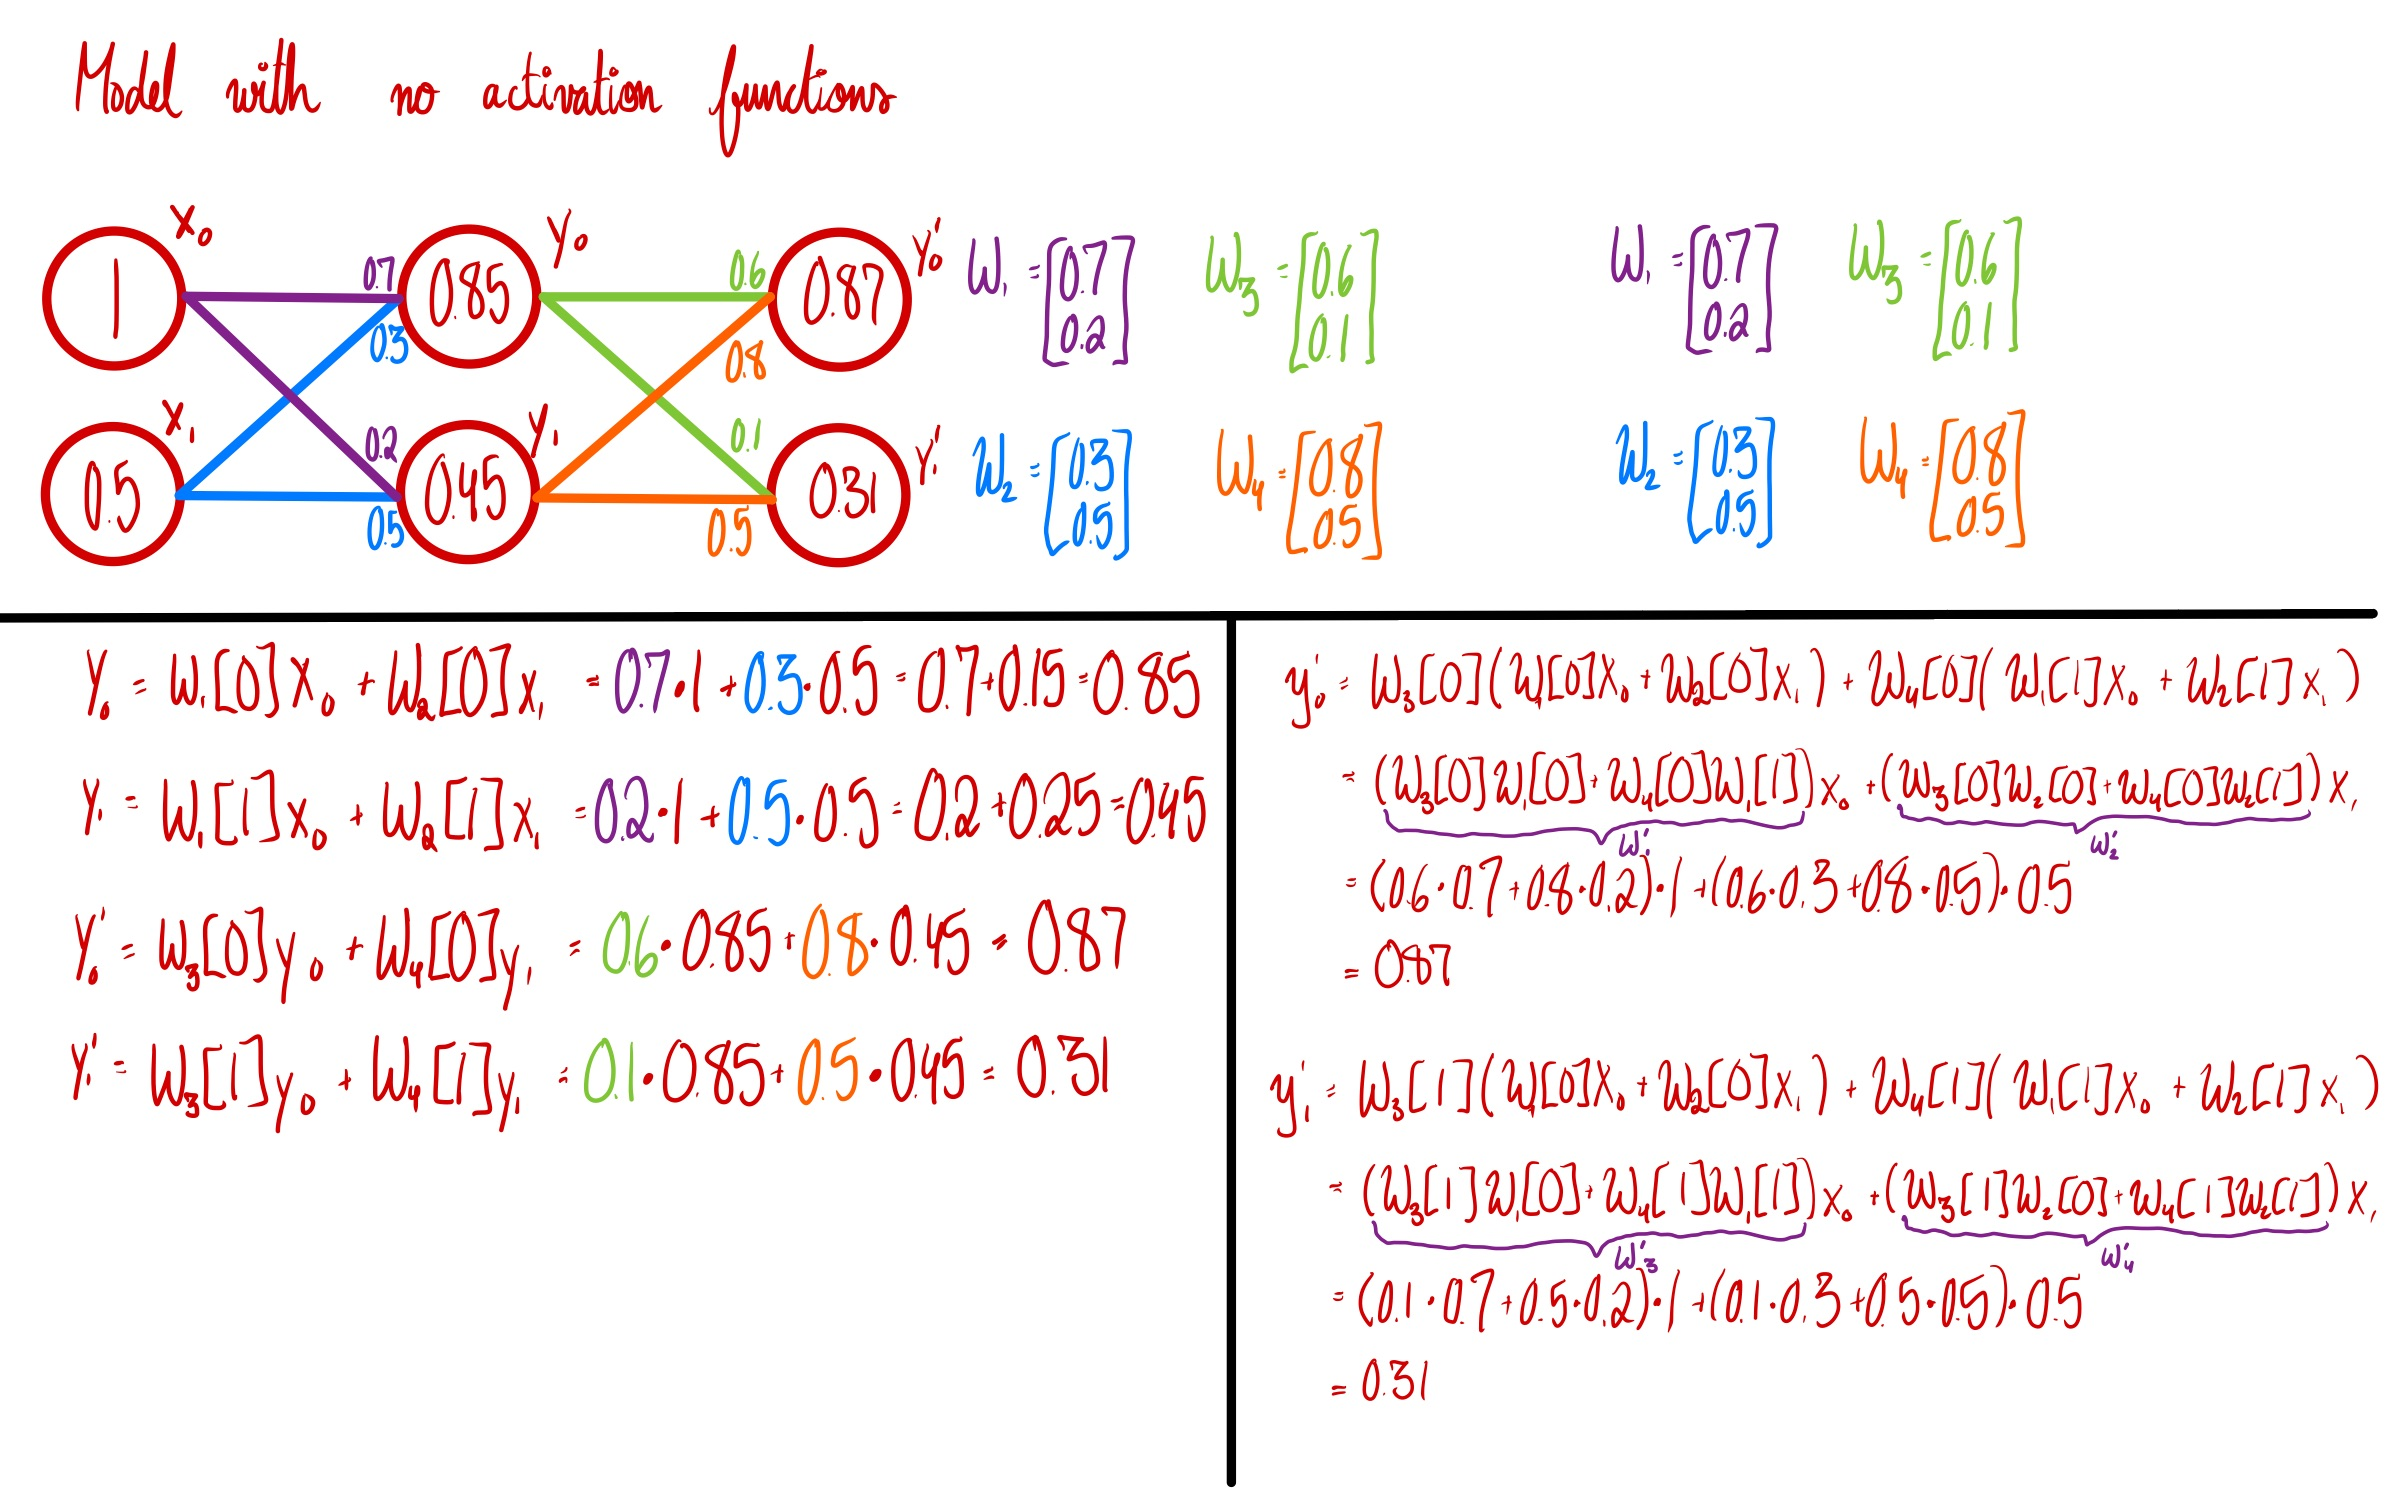

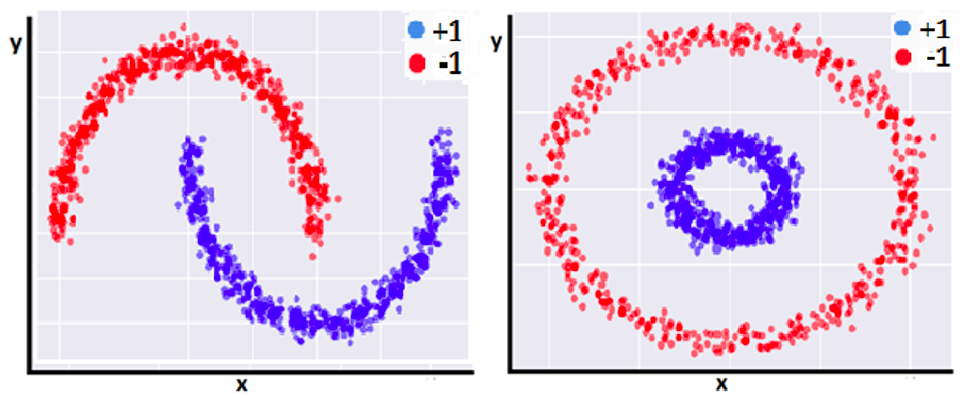

# How does introducing non-linearity allow for better predictions (Universal Approximation Theorem) 

This is a pseudo proof of the Universal Approximation Theorem taken from http://neuralnetworksanddeeplearning.com/chap4.html. The theorem states that a neural network with one hidden layer and a bounded, non-constant, and continuous activation function is a universal function approximator. 

In [ ]:
def sigmoid_activation(weight, bias):
  t = np.linspace(-5,5)
  y=1/(1+math.e**(-((weight*t+bias))))
  plt.plot(t, y)
  plt.show()

We plot the activation of a hidden layer in a network where the input is x which is given by the sigmoid function $\dfrac{1}{1+e^{W*x+b}}$

In [ ]:
%matplotlib inline
interactive_plot = interactive(sigmoid_activation, weight=(-100,100,1), bias=(-100,100,1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=0, description='weight', min=-100), IntSlider(value=0, description='bias…

In [ ]:
def sigmoid_activation(weight, bias):
  t = np.linspace(-5,5)
  y=weight*t+bias
  plt.plot(t, y)
  plt.show()

We plot the activation of a final layer in a network where the input is x and the network has 1 hidden layer with 2 neurons. This is given by $σ(σ(W_1*x+b_1)+\sigma(W_2*x+b_2))$ where $σ$ is used to denote the sigmoid function in this example although we could use any bounded, continuous, non linear function

In [ ]:
def sigmoid_activation_final_layer(weight1,weight2,weight3,weight4, bias1,bias2,bias3):
  t = np.linspace(0,1)
  y=(weight3*sigmoid_function(weight2*t+bias1))+(weight4*sigmoid_function((weight2*t+bias2)))+bias3
  plt.plot(t, y)
  plt.show()

In [ ]:
def relu_activation_final_layer(weight1,weight2,weight3,weight4, bias1,bias2,bias3):
  t = np.linspace(0,1)
  y=(weight3*relu_function(weight2*t+bias1))+(weight4*relu_function((weight2*t+bias2)))+bias3
  plt.plot(t, y)
  plt.show()

In [ ]:
%matplotlib inline
interactive_plot = interactive(relu_activation_final_layer, weight1=(-100,1000,1),weight2=(-100,1000,1), weight3=(-5,5,1),weight4=(-5,5,1),bias1=(-1000,100,1),bias2=(-1000,100,1),bias3=(-100,100,1))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=450, description='weight1', max=1000, min=-100), IntSlider(value=450, de…

#Final Layer Activation Functions 

While functions like sigmoid can be used for the last layer of a binary classifier, we tend to use softmax for multiclass classification and we tend to use linear functions as the activation for regression 

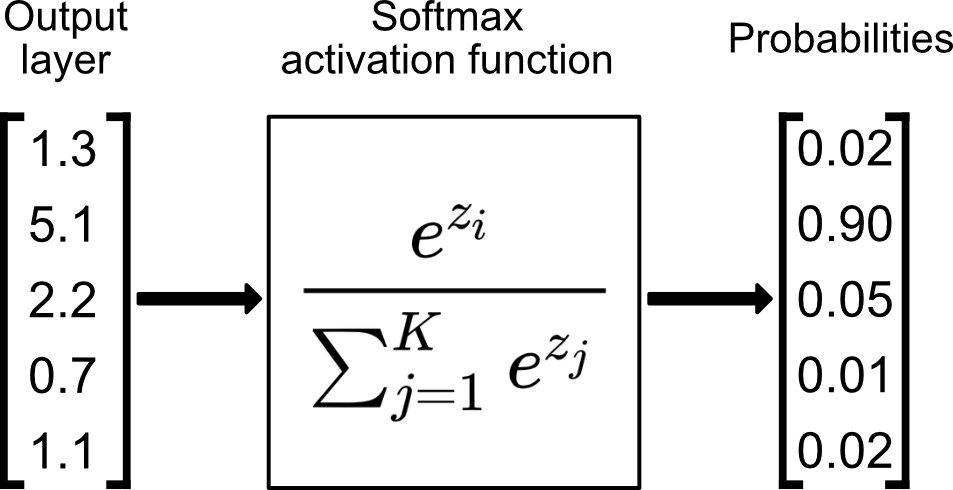

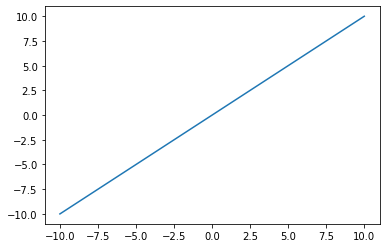

In [ ]:
x=np.linspace(-10,10)
plt.plot(x,x)

The reason why we use the identity function as the identity for a regression task is because the output is a weighted sum of a activations in the previous layer where the output would be $Z=W*x+b$

# How do transformations to an activation function change the model.

The following code will allow us to change the activation function and see how that effects the output of our model 

In [1]:
from keras.datasets import mnist
import keras
(x_train, y_train), (x_test, y_test) = mnist.load_data()
image_vector_size = 28*28
x_train = x_train.reshape(x_train.shape[0], image_vector_size)
x_test = x_test.reshape(x_test.shape[0], image_vector_size)
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11490434/11490434 [==============================] - 0s 0us/step


In [2]:
from keras.layers import Activation
from keras import backend as K
from keras.utils.generic_utils import get_custom_objects


def custom_activation(x):
     return (K.relu(x))

get_custom_objects().update({'custom_activation': Activation(custom_activation)})

In [3]:

from keras.layers import Dense # Dense layers are "fully connected" layers
from keras.models import Sequential # Documentation: https://keras.io/models/sequential/

image_size = 784 # 28*28
num_classes = 10 # ten unique digits

model = Sequential()

# The input layer requires the special input_shape parameter which should match
# the shape of our training data.
model.add(Dense(units=32, activation="custom_activation", input_shape=(image_size,)))
#odel.add(Activation(custom_activation, name='SpecialActivation'))

model.add(Dense(units=num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 10)                330       
                                                                 
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
import numpy as np 
list1=np.array([100,100,100,1000,1000,1000,1000,100])

In [ ]:
list1.shape

(8,)

In [ ]:
y_true=np.array([100])

In [ ]:
y=100
model = keras.Sequential([
Dense(32, input_shape=(8,), activation="relu", name="layer1"),
Dense(8, activation="tanh", name="layer2"),
Dense(1, activation="LeakyReLU", name="layer3")])
opt = keras.optimizers.Adam(learning_rate=0.01)
model.compile(loss="mse", optimizer=opt)
model.predict(list1.reshape(1,8))
model.fit(list1.reshape(1,8), y_true)

1/1 [==============================] - 1s 1s/step - loss: 9637.6016


KeyError: ignored

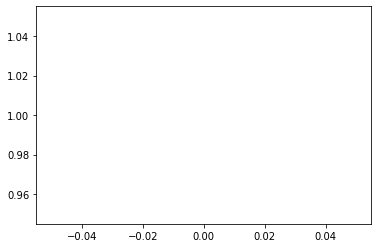

In [ ]:
model.compile(optimizer="adam", loss='mse', metrics=['accuracy'])
history = model.fit(x_train[0].reshape(1,784), y_train[0].reshape(1,10), verbose=False)
loss, accuracy  = model.evaluate(x_test, y_test, verbose=False)
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')